# Monte Carlo Simulation
## Budget for Sales Commissions

In [1]:
from statsmodels.distributions.empirical_distribution import ECDF

In [5]:
l = [3,3,1,4]
dj = ECDF(l)
dj([3,55,0.5,1.5])

array([0.75, 1.  , 0.  , 0.25])

In [6]:
np.quantile(l,q=0.975)

3.925

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
#historical performance
mu = 1
std = 0.1
n = 1000
sales_person = 500

pct_to_target = np.random.normal(mu, std, sales_person).round(2)

In [4]:
sales_target_values = [75_000,100_000,200_000,300_000,400_000,500_000]
sales_target_prob = [.3,.3,.2,.1,.05,.05]
sales_target = np.random.choice(sales_target_values, sales_person, p=sales_target_prob)

In [5]:
df = pd.DataFrame(data={'pct_to_target':pct_to_target,'sales_target':sales_target},index=range(sales_person))
df['sales'] = df['pct_to_target'] * df['sales_target']

In [7]:
def commission(x):
    if x <= .9:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

df['commission'] = df['pct_to_target'].apply(commission)
df['commission_amount'] = df['commission']*df['sales']

In [10]:
#Monte Carlo Simulation
all_stats = []
for i in range(n):
    pct_to_target = np.random.normal(mu, std, sales_person).round(2)
    sales_target = np.random.choice(sales_target_values, sales_person, p=sales_target_prob)
    df = pd.DataFrame(data={'pct_to_target':pct_to_target,'sales_target':sales_target},index=range(sales_person))
    df['sales'] = df['pct_to_target'] * df['sales_target']
    df['commission'] = df['pct_to_target'].apply(commission)
    df['commission_amount'] = df['commission']*df['sales']
    all_stats.append([df['sales'].sum().round(0),
                     df['commission_amount'].sum().round(0),
                     df['sales_target'].sum().round(0)])


In [11]:
results = pd.DataFrame.from_records(all_stats, columns=['sales','commission_amount','sales_target'])
results.describe().style.format('{:,}')

,sales,commission_amount,sales_target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,713,812.5","2,857,767.866","83,723,825.0"
std,"2,709,985.307078835","101,972.5167685988","2,656,805.0092606028"
min,"76,215,500.0","2,584,752.0","76,025,000.0"
25%,"81,841,625.0","2,791,835.5","81,800,000.0"
50%,"83,634,500.0","2,854,687.0","83,600,000.0"
75%,"85,465,562.5","2,923,265.5","85,500,000.0"
max,"91,272,250.0","3,180,802.0","91,300,000.0"


Text(0, 0.5, 'frequency')

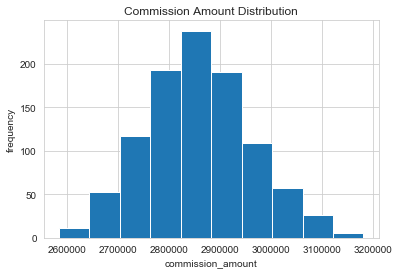

In [14]:
import matplotlib.pyplot as plt
results['commission_amount'].hist()
plt.title('Commission Amount Distribution')
plt.xlabel('commission_amount')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

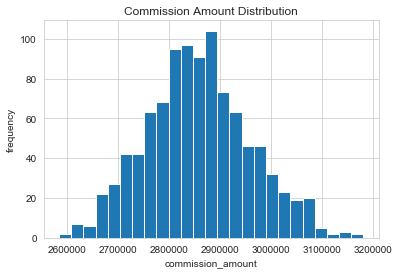

In [15]:
import matplotlib.pyplot as plt
x=results['commission_amount'].values
plt.hist(x,bins=25)
plt.title('Commission Amount Distribution')
plt.xlabel('commission_amount')
plt.ylabel('frequency')